optimized a step
optimized a step
optimized a step
[5 1] : 1.048
[ 6 -1] : 1.744
[7 3] : 1.048
[1 7] : 1.272
[2 8] : 1.272
[3 8] : 1.04


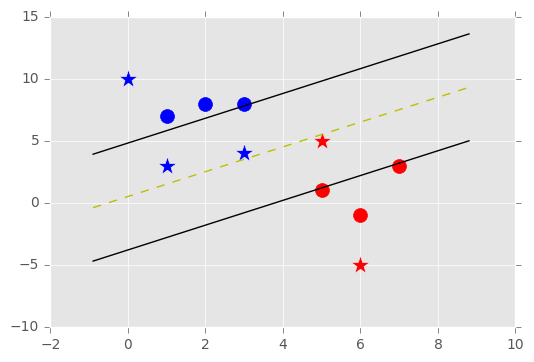

In [3]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use('ggplot')

# init is initialization method, anything u define in there will happen
# other methods have to be called individually
class Support_Vector_Machine:
    def __init__(self, visualization = True):
        self.visualization = visualization
        self.colors = {1:'r',-1:'b'}
        if self.visualization: # graphing with matplotlib
            self.fig = plt.figure() # figure, whiole window
            self.ax = self.fig.add_subplot(1,1,1) # specific subplot
    
    # fit means train
    # look at stanfords optimization paper. called convex optimization
    # fast training of svm using smo is the part u want 
    # much better methods of optimization than this
    def fit(self, data):
        self.data = data # so algo can reference data
        # {||w||:[w,b]}, opt dict is magnitudes
        opt_dict = {}
        
        # each step, transform by each of these to try each
        transforms = [[1,1],[-1,1],[1,-1],[-1,-1]] 
        all_data = []
        # populate data
        for yi in self.data: # yi is class
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)
        #print(all_data)
        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None
        
        step_sizes = [self.max_feature_value * .1,
                      self.max_feature_value * .01,
                      self.max_feature_value * .001] 
        # big steps first, then once find that value, smaller steps
        # point of expense is is  after .01
        # can add smaller steps
        # support vectors yi(wi.w+b) = 1 or close, like 1.01
        
        # extremely expensive and b doesnt need to take as small as steps as w
        b_range_multiple = 2
        b_multiple = 5
        # corner cutting, continually setting w vector to this
        latest_optimum = self.max_feature_value * 10
        
        # stepping process
        for step in step_sizes:
            #corner curring mentioned earlier
            w = np.array([latest_optimum,latest_optimum])
            
            # can do this cuz convex, we know when we are optimized
            optimized = False
            while not optimized:
                # this is like our big 'U' to optimize to the bottom
                #arange lets us specify our step, step by b_multiple
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple),
                                  self.max_feature_value*b_range_multiple, 
                                   step*b_multiple): 
                    for transformation in transforms:
                        w_t = w* transformation
                        found_option = True
                        #weakest link in SVM fundamentally
                        #SMO attempts to fix this a bit
                        #yi (xi,w+b) >= 1

                        for i in self.data:
                            for xi in self.data[i]:
                                yi = i
                                if not yi*(np.dot(w_t,xi)+b) >= 1:
                                    # as soon as u find a false, all thrown out
                                    found_option = False
                                    
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t, b] 
                            
                if w[0]<0: #got as far as u can go to bottom
                    optimized = True
                    print('optimized a step')
                else:
                    w = w-step # take another step
            # find smallest magnitude, minimized
            norms = sorted([n for n in opt_dict]) #sorted magnitudes
            opt_choice = opt_dict[norms[0]] # smallest magnitude

            self.w = opt_choice[0] # w
            self.b = opt_choice[1] # b
            latest_optimum = opt_choice[0][0] + step*2
            
        for i in self.data:
            for xi in self.data[i]:
                yi=i
                print(xi,':',yi*(np.dot(self.w,xi)+self.b)) #want it to be close to 1,
                #as close to ITS support vector hyperplane as possible, 
                #not the decision boundary, which determines the class
                # distance is 1/magnitude, so minimize magnitude to maximize distance of both hyperplanes
        
    def predict(self,features):
        # sign of (x.w+b)
        # dot product returns a scalar value
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)
        if classification != 0 and self.visualization:
            self.ax.scatter(features[0], features[1], s=200, marker='*', c=self.colors[classification])
        return classification
        
    # this is only for humans to see and use, not for algo
    def visualize(self):
        #ax is axis
        #graph all our data
        [[self.ax.scatter(x[0],x[1],s=100,color=self.colors[i]) for x in data_dict[i]] for i in data_dict]
        
        # gives us hyperplane value = x.w+b
        # v = x.w+b
        # pos sv = 1
        # neg sv = -1
        # decision boundary = 0
                            
        # this is only for humans to see that decision boundary
        # decision boundary is not what matters in the algo
        def hyperplane(x,w,b,v):
            return(-w[0]*x-b+v) / w[1]

        datarange = (self.min_feature_value*.9, self.max_feature_value*1.1)                    
        hyp_x_min = datarange[0]    
        hyp_x_max = datarange[1]   
        
        #(w.x+b) = 1
        # positive support vector hyperplane (line)
        psv1 = hyperplane(hyp_x_min, self.w, self.b, 1)
        psv2 = hyperplane(hyp_x_max, self.w, self.b, 1)
        self.ax.plot([hyp_x_min,hyp_x_max],[psv1,psv2], 'k')
                            
        #(w.x+b) = -1
        # negative support vector hyperplane (line)
        nsv1 = hyperplane(hyp_x_min, self.w, self.b, -1)
        nsv2 = hyperplane(hyp_x_max, self.w, self.b, -1)
        self.ax.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2], 'k')                    
        
        #(w.x+b) = 0
        # decision boundary hyperplane (line)
        db1 = hyperplane(hyp_x_min, self.w, self.b, 0)
        db2 = hyperplane(hyp_x_max, self.w, self.b, 0)
        self.ax.plot([hyp_x_min,hyp_x_max],[db1,db2], 'y--') 
        
        plt.show()
                            
# np array of arrays for each data class 1 and -1
data_dict = {-1:np.array([[1,7],[2,8],[3,8]]), 
             1:np.array([[5,1],[6,-1],[7,3]])}

svm = Support_Vector_Machine()
svm.fit(data = data_dict)   

predict_us=[[0,10],[1,3],[3,4],[5,5],[6,-5]]
for p in predict_us:
    svm.predict(p)
svm.visualize()

#use an svm algo like this for linearly seperable data
